### Paqueterias

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Funciones

In [92]:
def Serial_covariance(df, windows, precios='Close'):
    
    df['Diff'] = df[precios].diff()
    df['Diff-1'] = df['Diff'].shift(-1)
    df = df.dropna().reset_index(drop=True)
    
    for i in windows:
        covarianza = df['Diff'].rolling(window=i).cov(df['Diff-1'])
        df[f'Spread_{i}'] = 2 * np.sqrt(np.abs(covarianza))
        
        df[f'Bid_{i}'] = np.where(df['Diff'] > 0, df[precios] - df[f'Spread_{i}'], df[precios])
        df[f'Ask_{i}'] = np.where(df['Diff'] > 0,df[precios], df[precios] + df[f'Spread_{i}'])
    
    return df

def block_method(df, windows, precios='Close'):
    df['Diff'] = df[precios].diff()
    df = df.dropna().reset_index(drop=True)


    for t in windows:
        spreads = [np.nan] * len(df)

        for i in range(len(df) - 2*t + 1):
            W1 = df['Diff'].iloc[i:i+t]
            W2 = df['Diff'].iloc[i+t:i+2*t]
            covarianzas = np.cov(W1, W2)[0,1]
            spreads[i + 2*t - 1] = 2 * np.sqrt(abs(covarianzas))

        df[f'Spread_{t}'] = spreads

        df[f'Bid_{t}'] = np.where(df['Diff'] > 0, df[precios] - df[f'Spread_{t}'], df[precios])
        df[f'Ask_{t}'] = np.where(df['Diff'] > 0, df[precios], df[precios] + df[f'Spread_{t}'])

    return df

### Limpieza de datos

In [93]:
df = pd.read_csv('aapl_5m_train.csv')
df = df.drop(['Unnamed: 0','Timestamp','Gmtoffset', 'Datetime', 'Open', 'High', 'Low', 'Volume' ], axis=1)
df_S = df.copy()
df_B = df.copy()
windows = [5, 10, 20, 50, 100]


### Serial Covariance

In [94]:
df_S = Serial_covariance(df_S, windows)
df_S


,Close,Diff,Diff-1,Spread_5,Bid_5,Ask_5,Spread_10,Bid_10,Ask_10,Spread_20,Bid_20,Ask_20,Spread_50,Bid_50,Ask_50,Spread_100,Bid_100,Ask_100
0,131.889999,-0.919998,0.169998,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN
1,132.059997,0.169998,0.190003,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997
2,132.250000,0.190003,-0.660004,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000
3,131.589996,-0.660004,-0.141098,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN
4,131.448898,-0.141098,-0.328903,0.565312,131.448898,132.014210,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39564,129.039993,0.019989,0.014999,0.092807,128.947186,129.039993,0.170663,128.869330,129.039993,0.089920,128.950073,129.039993,0.079913,128.960080,129.039993,0.132918,128.907075,129.039993
39565,129.054992,0.014999,0.325012,0.109240,128.945752,129.054992,0.184538,128.870454,129.054992,0.120792,128.934200,129.054992,0.088185,128.966807,129.054992,0.133413,128.921579,129.054992
39566,129.380004,0.325012,0.384400,0.231993,129.148011,129.380004,0.074165,129.305839,129.380004,0.052312,129.327692,129.380004,0.052211,129.327793,129.380004,0.152079,129.227925,129.380004
39567,129.764404,0.384400,0.185592,0.211500,129.552904,129.764404,0.143741,129.620663,129.764404,0.091643,129.672761,129.764404,0.089236,129.675168,129.764404,0.161393,129.603011,129.764404


### Block Method

In [95]:
df_B = block_method(df_B, windows)
df_B

,Close,Diff,Spread_5,Bid_5,Ask_5,Spread_10,Bid_10,Ask_10,Spread_20,Bid_20,Ask_20,Spread_50,Bid_50,Ask_50,Spread_100,Bid_100,Ask_100
0,131.889999,-0.919998,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN,NaN,131.889999,NaN
1,132.059997,0.169998,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997,NaN,NaN,132.059997
2,132.250000,0.190003,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000,NaN,NaN,132.250000
3,131.589996,-0.660004,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN,NaN,131.589996,NaN
4,131.448898,-0.141098,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,129.054992,0.014999,0.143989,128.911003,129.054992,0.064309,128.990683,129.054992,0.086049,128.968943,129.054992,0.046804,129.008188,129.054992,0.200519,128.854473,129.054992
39568,129.380004,0.325012,0.205689,129.174315,129.380004,0.028237,129.351767,129.380004,0.070957,129.309047,129.380004,0.047191,129.332813,129.380004,0.200046,129.179958,129.380004
39569,129.764404,0.384400,0.176345,129.588059,129.764404,0.192435,129.571969,129.764404,0.108540,129.655864,129.764404,0.036521,129.727883,129.764404,0.202426,129.561978,129.764404
39570,129.949996,0.185592,0.176193,129.773803,129.949996,0.182080,129.767916,129.949996,0.078493,129.871503,129.949996,0.054715,129.895281,129.949996,0.203482,129.746514,129.949996


### Average Spreads AAPL

In [ ]:
avg_spread_per_window = pd.DataFrame({
    'Window': windows,
    'Avg Spread S_Cov':[df_S[f'Spread_{w}'].mean() for w in windows],
    'Avg Spread B_Method': [df_B[f'Spread_{w}'].mean() for w in windows]
})

avg_spread_per_window


,Window,Avg Spread S_Cov,Avg Spread B_Method
0,5,0.252567,0.265275
1,10,0.220169,0.221454
2,20,0.197689,0.189835
3,50,0.182244,0.158118
4,100,0.168017,0.141632


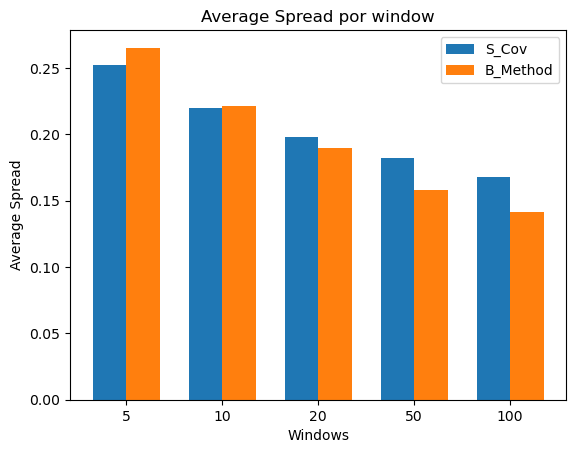

In [115]:
windows = avg_spread_per_window['Window']
s_cov = avg_spread_per_window['Avg Spread S_Cov']
b_method = avg_spread_per_window['Avg Spread B_Method']

x = np.arange(len(windows))
width = 0.35  

plt.bar(x - width/2, s_cov, width, label='S_Cov')
plt.bar(x + width/2, b_method, width, label='B_Method')


plt.xticks(x, windows)
plt.xlabel('Windows')
plt.ylabel('Average Spread')
plt.title('Average Spread por window')
plt.legend()
plt.show()
